**MÉTODO DE DIFERENCIAS FINITAS**

Últil para aproximación de la solución de ecuaciones diferenciales ordinarias o parciales.

Se reemplazan derivadas de una función por expresiones algebraicas que aproximan esas derivadas en un conjunto finito de puntos discretos.



*   Diferencia hacía adelante.
*   Diferencia hacía atras.
*   Diferencia centrada.

El dominio se divide en una malla de puntos,las derivadas en las EDPs se reemplazan por las expresiones de diferencias finitas en los puntos de la malla, convirtiendo la EDP en un conjunto de ecuaciones algebraicas que se pueden resolver de manera directa o indirecta.


Considerando un problema de condiciones de frontera de segundo orden lineal tal que:

$$y''=p(x)y'+q(x)y+r(x)$$

Para $a \leq x \leq b$ con $y(a)=α $ y $y(b)=β$.

Se parte el intervalo [a,b] en (N+1) subintervalos equivalentes dados por $x_{i}= a + ih$ con $i=0,1,...,N+1$ y h es el step $h=\dfrac{(b-a)}{N+1}$. Queda la siguiente ecuación diferencial:

$$y''(x_{i})=p(x_{i})y'(x_{i})+q(x_{i})y(x_{i}) + r(x_{i})$$

Esta se puede expandir en series de Taylor tanto para $(x_{i+1})$ como para $(x_{i-1})$ hasta el cuarto orden. Y de esta manera se pueden despejar la primera y la segunda derivada en términos de los $x$ anteriores y posteriores.

Para la segunda derivada se obtiene:

$$y''(x_{i})=\dfrac{1}{h^{2}}\left[ y(x_{i+1}) - 2y(x_{i}) +y(x_{i}) \right] - \dfrac{h^{2}}{24} \left[ y^{(4)}(ξ_{i}^{+}) + y^{(4)}(ξ_{i}^{-}) \right]$$

Para la primera derivada:

$$y'(x_{i})= \dfrac{1}{2h} \left[y(x_{i+1})-y(x_{i-1}) \right] - \dfrac{h^{2}}{6}y'''(η_{i})$$

Usando el método de diferencia centrada, resulta la siguiente ecuación:

$$\dfrac{y(x_{i+1})-2y(x_{i})+y(x_{i-1})}{h^{2}}= p(x_{i})\left[ \dfrac{y(x_{i+1})-y(x_{i-1})}{2h} \right] + q(x_{i})y(x_{i})+r(x_{i})-\dfrac{h^{2}}{12}\left[ 2p(x_{i})y'''(η_{i})-y^{(4)}(ξ_{i})\right]$$

Para tener un método de diferencias finitas con un error de orden $O(h^{2})$ se tienen en cuenta las condiciones de frontera para definir un sistema de ecuaciones lineales:

$$w_{0}=α $$
$$ w_{N+1}=β$$

Aplicando lo anterior, resulta el siguiente sistema de ecuaciones lineales:

$$-\left( 1+\dfrac{h}{2}p(x_{i}) \right) w_{i-1} + (2+h^{2}q(x_{i}))w_{i} - \left(1-\dfrac{h}{2}p(x_{i})\right)w_{i+1}= -h^2r(x_i)$$

Este sistema de ecuaciones se puede expresar como: $A \textbf{w}=\textbf{b}$. Donde $A$ es un matriz tridiagonal de $NxN$.

En el caso de que sea no lineal entonces:

$$y'' = f(x,y,y')$$

Con $a \leq x \leq b$, para $y(a)=α$ y $y(b)=β$


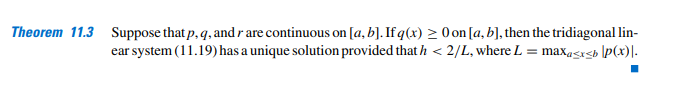

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation, PillowWriter

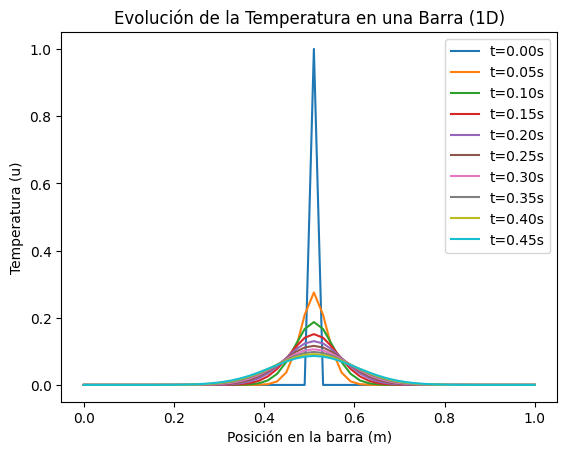

In [2]:
# ===========================================================
# Solución de la Ecuación de Calor 1D usando el Método de Diferencias Finitas
# ===========================================================

# Teoría:
# La ecuación de calor en 1D es:
# ∂u/∂t = α ∂²u/∂x²
# Donde:
#   u(x, t) es la temperatura en el punto x y en el instante de tiempo t
#   α es la difusividad térmica del material
#
# El método de diferencias finitas se usa para aproximar las derivadas en espacio y tiempo
# con pasos discretos. Para la derivada temporal usamos una diferencia hacia adelante:
# ∂u/∂t ≈ (u_i^{n+1} - u_i^n) / Δt
# Para la derivada espacial de segundo orden usamos diferencias centradas:
# ∂²u/∂x² ≈ (u_{i+1}^n - 2u_i^n + u_{i-1}^n) / Δx²
#
# Reemplazando estas aproximaciones en la ecuación original, obtenemos:
# u_i^{n+1} = u_i^n + α (Δt / Δx²) * (u_{i+1}^n - 2u_i^n + u_{i-1}^n)
#
# El valor de α * (Δt / Δx²) se conoce como el número de Fourier (Fo), que debe ser Fo ≤ 1/2
# para garantizar la estabilidad del método.
#
# ===========================================================
# Implementación en Python
# ===========================================================

# Parámetros de la ecuación y de la simulación
alpha = 0.01  # Difusividad térmica
L = 1.0       # Longitud de la barra (en metros)
T = 0.5       # Tiempo total de la simulación (en segundos)
nx =50       # Número de puntos en la discretización espacial
nt = 1000   # Número de pasos de tiempo
dx = L / (nx - 1)  # Tamaño del paso espacial
dt = T / nt   # Tamaño del paso temporal

# Estabilidad (número de Fourier)
Fo = alpha * dt / dx**2
if Fo > 0.5:
    raise ValueError(f"El número de Fourier (Fo = {Fo}) es mayor que 0.5, lo que puede causar inestabilidad.")

# Condiciones iniciales
u = np.zeros(nx)  # Distribución inicial de temperatura en la barra (0 en todos lados)

# Establecemos una condición inicial no trivial, por ejemplo, un pico de temperatura en el centro
u[int(nx/2)] = 1.0  # Pico de temperatura en el centro de la barra

# Condiciones de frontera (temperatura fija en los extremos de la barra)
u[0] = u[-1] = 0  # Extremos a temperatura 0

# Preparamos una matriz para almacenar la evolución temporal de la temperatura
u_hist = [u.copy()]  # Guardamos el estado inicial

# Iteramos en el tiempo aplicando el esquema de diferencias finitas
for n in range(nt):
    u_new = u.copy()  # Creamos una copia del estado actual
    for i in range(1, nx-1):  # Evitamos los extremos (condiciones de frontera)
        # Ecuación de diferencias finitas
        u_new[i] = u[i] + Fo * (u[i+1] - 2*u[i] + u[i-1])

    u = u_new.copy()  # Actualizamos el estado
    u_hist.append(u.copy())  # Guardamos la nueva distribución

# Convertimos la historia de u a un arreglo de numpy para manipulación posterior
u_hist = np.array(u_hist)

# ===========================================================
# Visualización de la solución
# ===========================================================

# Graficamos la evolución de la temperatura en el tiempo
fig, ax = plt.subplots()
for i in range(0, nt, nt // 10):  # Mostramos 10 curvas a lo largo del tiempo
    ax.plot(np.linspace(0, L, nx), u_hist[i], label=f"t={i*dt:.2f}s")

ax.set_xlabel('Posición en la barra (m)')
ax.set_ylabel('Temperatura (u)')
ax.set_title('Evolución de la Temperatura en una Barra (1D)')
ax.legend()

#plt.ylim(0,0.050)
plt.show()

**Parámetros de la ecuación:**

* $α$: Difusividad térmica del material.
* $L$: Longitud de la barra.
* $T$: Tiempo total de simulación.
* $nx$: Número de puntos espaciales (malla)
* $nt$: Número de pasos de tiempo.

**Discretización:**

* $dx$: Tamaño del paso espacial, calculado dividiendo la longitud de la barra por el número de puntos menos uno.
* $dt$: Tamaño del paso temporal, calculado dividiendo el tiempo total por el número de pasos de tiempo.

**Condición de estabilidad:**

Calculamos el número de Fourier $F_{0}$ para asegurar la estabilidad del método. Si $F_{0}>0.5$, el programa lanza un error.

**Condiciones iniciales y de frontera:**

* La condición inicial es una barra con temperatura cero en todos los puntos, excepto un pico en el centro.
* Las condiciones de frontera son de Dirichlet: temperatura cero en los extremos de la barra.

**Iteración temporal:**

* Usamos la fórmula de diferencias finitas para avanzar en el tiempo y actualizar la distribución de temperatura en cada paso.
* Guardamos el estado de la temperatura después de cada paso de tiempo para su posterior visualización.

**Visualización:**

Usamos matplotlib para graficar la evolución de la temperatura a lo largo del tiempo.

**Ejecución y resultados:**
Al ejecutar este programa, obtendrás una gráfica que muestra cómo la temperatura evoluciona en la barra con el tiempo, desde la condición inicial hasta alcanzar una distribución más uniforme.

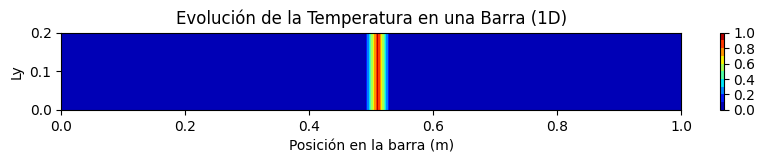

In [3]:
Ntiempo=2
Temp = np.repeat(u_hist[Ntiempo], 10).reshape(50, 10)
Lx=1
Ly=0.2
x=np.linspace(0, Lx, nx)
y=np.linspace(0, Ly, 10)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(10, 1))
plt.contourf(X,Y,Temp.T,10, vmin=0, vmax=1, cmap='jet')
plt.colorbar()
plt.xlabel('Posición en la barra (m)')
plt.ylabel('Ly')
plt.title('Evolución de la Temperatura en una Barra (1D)')
plt.show()

#plt.figure()
#plt.plot(np.linspace(0, L, nx), u_hist[Ntiempo], label=f"t={i*dt:.2f}s")
#plt.show()

In [4]:
Lx=1
Ly=0.1
ny=100
x=np.linspace(0, Lx, nx)
y=np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x,y)

Temp = np.zeros((nt+1, nx, ny))
# Evolucion temporal , y construccion de la barra
for i in range(0, nt+1):
  Temp[i] = np.repeat(u_hist[i], ny).reshape(nx, ny)

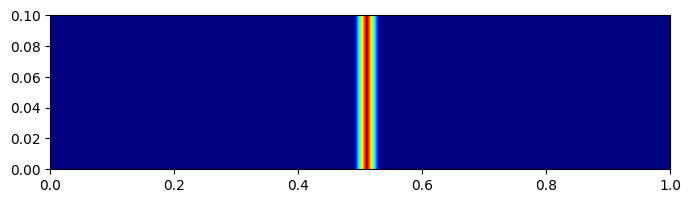

In [5]:
maxT = np.max(Temp)
fig, ax = plt.subplots(figsize=(8, 2))

contour = ax.contour(X, Y, Temp[0].T/maxT, 200, vmin=0, vmax=1, cmap='jet')  # Actualizar con el nuevo frame
#ax.set_colorbar()
ax.set_xlabel('Posición en la barra (m)')
ax.set_ylabel('Ly')
ax.set_title('Evolución de la Temperatura en una Barra (1D)')

def update(frame):
    ax.clear()  # Limpiar el gráfico anterior
    contour = ax.contourf(X, Y, Temp[frame].T/maxT, 200, vmin=0, vmax=1, cmap='jet')  # Actualizar con el nuevo frame
    return contour,


# Crear la animación con un intervalo mayor y repetir en False
ani = FuncAnimation(fig, update, frames=range(0, 1001, 10), interval=100, repeat=False)
ani.save("mapa_calor_1d_ecuacion_calor_ejes_modificados01.gif", writer=PillowWriter(fps=10))

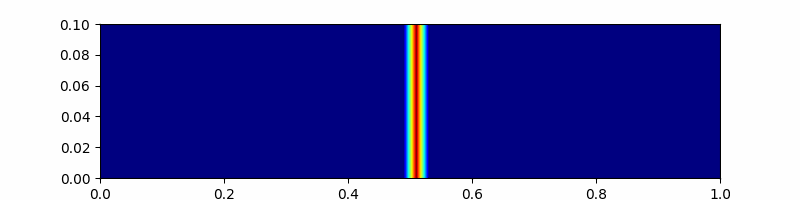

In [6]:
from IPython.display import Image
Image(filename="mapa_calor_1d_ecuacion_calor_ejes_modificados01.gif")

**Animación con fuente permanente y condiciones iniciales tipo gaussianas**

In [7]:
def gaussian_equation(x, mu, sigma):
  """Genera una ecuación gaussiana.

  Args:
    x: Valores de x para los que se quiere calcular la función.
    mu: Media de la distribución.
    sigma: Desviación estándar de la distribución.

  Returns:
    Valores de la función gaussiana para los valores de x dados.
  """
  return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

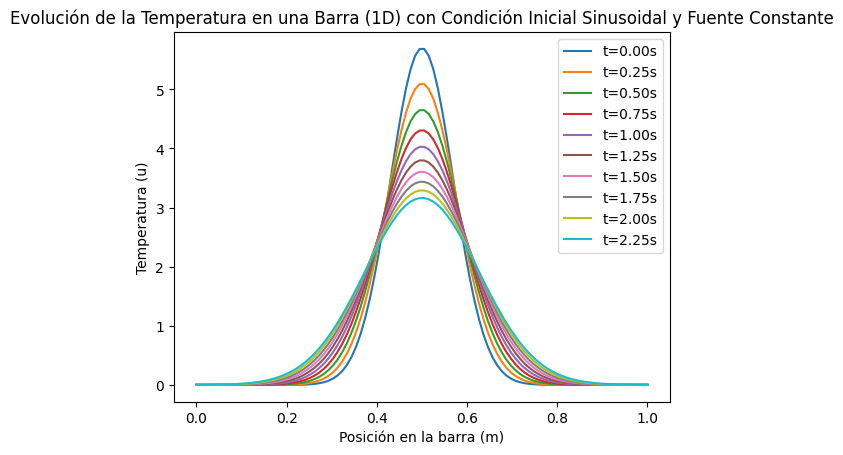

In [8]:
nx=100
nt=5000
mu = L/2
sigma = 0.07
x = np.linspace(0, L, nx)
u = gaussian_equation(x, mu, sigma)

# Parámetros de la fuente de calor constante
#source_position = int(3*nx / 4)  # Posición central de la barra
#source_value = 1.0  # Valor de la fuente de calor que se añade en cada paso de tiempo

# Preparamos una matriz para almacenar la evolución temporal de la temperatura
u_hist = [u.copy()]  # Guardamos el estado inicial

# Iteramos en el tiempo aplicando el esquema de diferencias finitas
for n in range(nt):
    u_new = u.copy()
    for i in range(1, nx-1):
        u_new[i] = u[i] + Fo * (u[i+1] - 2*u[i] + u[i-1])

    # Añadir la fuente constante en el centro de la barra
    #u_new[source_position] += source_value

    # Condiciones de frontera de Neumann (gradiente cero, aislamiento)
    u_new[0] = u_new[1]   # Aislamiento térmico en el extremo izquierdo
    u_new[-1] = u_new[-2]  # Aislamiento térmico en el extremo derecho

    u = u_new.copy()  # Actualizamos el estado
    u_hist.append(u.copy())  # Guardamos la nueva distribución

# Convertimos la historia de u a un arreglo de numpy para manipulación posterior
u_hist = np.array(u_hist)

# ===========================================================
# Visualización de la solución
# ===========================================================

# Graficamos la evolución de la temperatura en el tiempo
fig, ax = plt.subplots()
for i in range(0, nt, nt // 10):  # Mostramos 10 curvas a lo largo del tiempo
    ax.plot(np.linspace(0, L, nx), u_hist[i], label=f"t={i*dt:.2f}s")

ax.set_xlabel('Posición en la barra (m)')
ax.set_ylabel('Temperatura (u)')
ax.set_title('Evolución de la Temperatura en una Barra (1D) con Condición Inicial Sinusoidal y Fuente Constante')
ax.legend()

plt.show()

In [9]:
x=np.linspace(0, Lx, nx)
y=np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x,y)
Temp = np.zeros((nt+1, nx, ny))
# Evolucion temporal , y construccion de la barra
for i in range(0, nt+1):
  Temp[i] = np.repeat(u_hist[i], ny).reshape(nx, ny)

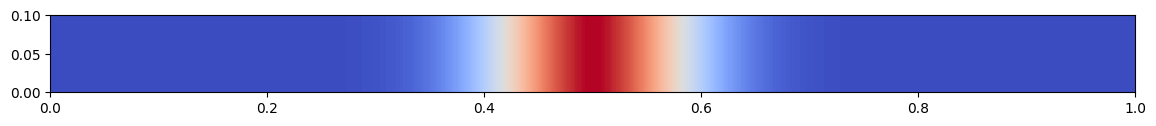

In [10]:
maxT = np.max(Temp)
fig, ax = plt.subplots(figsize=(14, 1))

contour = ax.contour(X, Y, Temp[0].T/maxT, 200, vmin=0, vmax=1, cmap='coolwarm')  # Actualizar con el nuevo frame
#ax.set_colorbar()
ax.set_xlabel('Posición en la barra (m)')
ax.set_ylabel('Ly')
ax.set_title('Evolución de la Temperatura en una Barra (1D)')

def update(frame):
    ax.clear()  # Limpiar el gráfico anterior
    contour = ax.contourf(X, Y, Temp[frame].T/maxT, 200, vmin=0, vmax=1, cmap='coolwarm')  # Actualizar con el nuevo frame
    return contour,


# Crear la animación con un intervalo mayor y repetir en False
ani = FuncAnimation(fig, update, frames=range(0, nt+1, 50), interval=100, repeat=False)
ani.save("mapa_calor_1d_ecuacion_calor_ejes_modificados01.gif", writer=PillowWriter(fps=10))

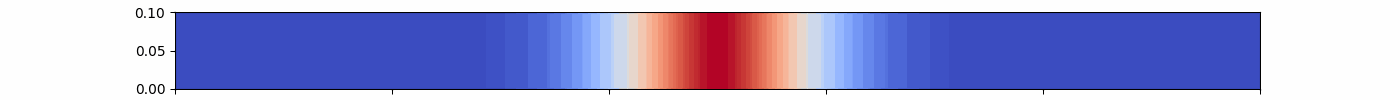

In [11]:
from IPython.display import Image
Image(filename="mapa_calor_1d_ecuacion_calor_ejes_modificados01.gif")